In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('LINK_rawdata.txt', sep="\t", header=None)
data.columns = ["TXID", "Date", "Unix Timestamp", "From Address", "To Address", "Amount"]
data['Unix Timestamp'] = pd.to_datetime(data['Unix Timestamp'], unit='s')

In [3]:
data.head()

,TXID,Date,Unix Timestamp,From Address,To Address,Amount
0,0xd2b983fb1546526f720dbd42a931f4390cbac3d741a2...,2017-09-17,2017-09-16 21:29:09,0xf55037738604fddfc4043d12f25124e94d7d1780,0xcd43a19ea5e4f9fcf229df53f86747ad2c5613be,350000000.0
1,0x9db683edbcc99b3b14df2e47935b68b2fdc048d5c34c...,2017-09-17,2017-09-16 21:32:59,0xf55037738604fddfc4043d12f25124e94d7d1780,0x98c63b7b319dfbdf3d811530f2ab9dfe4983af9d,350000000.0
2,0x392c4747ac38d2f2530dedc2b453474bb925f2cf1cb4...,2017-09-17,2017-09-16 21:38:28,0xf55037738604fddfc4043d12f25124e94d7d1780,0xe0362f7445e3203a496f6f8b3d51cbb413b69be2,50000000.0
3,0x3990f1705765090f6d6e1a189896b32b20f08ea014b5...,2017-09-17,2017-09-16 21:40:12,0xf55037738604fddfc4043d12f25124e94d7d1780,0x75398564ce69b7498da10a11ab06fd8ff549001c,50000000.0
4,0xfb321f16f08aea1d378efc8d82d26d02e5319863e9c1...,2017-09-17,2017-09-16 21:43:49,0xf55037738604fddfc4043d12f25124e94d7d1780,0x5560d001f977df5e49ead7ab0bdd437c4ee3a99e,50000000.0


In [4]:
data2 = pd.read_csv("LINK_account_stats.txt", sep="\t", header=None)
data2.columns = ["Account", "Balance", "In_Degree", "Out_Degree", "Recent Seen (UnixTimeStamp)"]
data2['Recent Seen (UnixTimeStamp)'] = pd.to_datetime(data2['Recent Seen (UnixTimeStamp)'], unit='s')

In [5]:
data2.head()

,Account,Balance,In_Degree,Out_Degree,Recent Seen (UnixTimeStamp)
0,0xef7a95a124001e13342e4ee6d72ba5a83296047b,0.000000,1,1,2018-11-19 22:02:08
1,0xcddd7af305929851670a54db6ad2796d498276f5,0.000433,3,2,2017-10-14 22:43:00
2,0x8b5871caadbcef81d632d41731d5b87b9c746bd5,447.000000,1,0,2018-01-05 11:46:29
3,0x6d0fd3708860a16fbfbff060ccbd9d34702f0cae,624.365000,1,0,2018-01-03 15:11:25
4,0xfde7f75f1b543097ee8622baed49fabd0a4d13ac,0.000000,1,1,2017-10-06 13:44:36


In [6]:
data2 = pd.DataFrame(data2)

# address별로 transaction count 묶기
기존 data에 count column만 추가

In [7]:
FromAdd = data.drop('To Address', axis=1)
FromAdd['Amount'] *= -1
FromAdd.rename(columns={'From Address': 'Address'}, inplace=True)
FromAdd.head()

,TXID,Date,Unix Timestamp,Address,Amount
0,0xd2b983fb1546526f720dbd42a931f4390cbac3d741a2...,2017-09-17,2017-09-16 21:29:09,0xf55037738604fddfc4043d12f25124e94d7d1780,-350000000.0
1,0x9db683edbcc99b3b14df2e47935b68b2fdc048d5c34c...,2017-09-17,2017-09-16 21:32:59,0xf55037738604fddfc4043d12f25124e94d7d1780,-350000000.0
2,0x392c4747ac38d2f2530dedc2b453474bb925f2cf1cb4...,2017-09-17,2017-09-16 21:38:28,0xf55037738604fddfc4043d12f25124e94d7d1780,-50000000.0
3,0x3990f1705765090f6d6e1a189896b32b20f08ea014b5...,2017-09-17,2017-09-16 21:40:12,0xf55037738604fddfc4043d12f25124e94d7d1780,-50000000.0
4,0xfb321f16f08aea1d378efc8d82d26d02e5319863e9c1...,2017-09-17,2017-09-16 21:43:49,0xf55037738604fddfc4043d12f25124e94d7d1780,-50000000.0


In [8]:
ToAdd = data.drop('From Address', axis=1)
ToAdd.rename(columns={'To Address': 'Address'}, inplace=True)

In [9]:
output = FromAdd.append(ToAdd)

In [10]:
result = output.groupby(['Address']).size().reset_index(name='counts')

In [11]:
result = output.merge(result)

In [12]:
result = result.sort_values(by=['counts'], ascending=False)

## Data check : 잘 합쳐졌는지

result.isnull().values.any() # 모두 merge 잘됨

compare_data = data2['Out_Degree'] + data2['In_Degree']
compare_data = data2.sort_values(by='In_Degree', ascending=False)
compare_data.rename(columns={'In_Degree': 'Degree'}, inplace=True)
compare_data = compare_data.drop('Out_Degree', axis = 1)
compare_data.head()

# Data 이해하기

In [13]:
result.head()

,TXID,Date,Unix Timestamp,Address,Amount,counts
88829,0xbf40475b2d45e9f489c8436c2e770fcb6a57b107381f...,2017-12-10,2017-12-09 16:35:38,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1725.834,42883
94148,0x6ca6b137a08a37011a1de6efc287330fec940e1a4f8e...,2018-04-02,2018-04-01 20:42:04,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,18440.000,42883
94162,0x1d08640795d3d983e8d040614c8cea0f5375cdc3470b...,2018-04-03,2018-04-02 19:02:35,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,1967.021,42883
94161,0xf7486717d117bc574bce482340a614d954485202d593...,2018-04-03,2018-04-02 17:42:34,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,3207.781,42883
94160,0xf5e2b301b7ca92a923b2c3d6298be094e94a6339969a...,2018-04-03,2018-04-02 16:42:07,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,10000.000,42883


In [14]:
boxplot = data.boxplot(column='Amount')

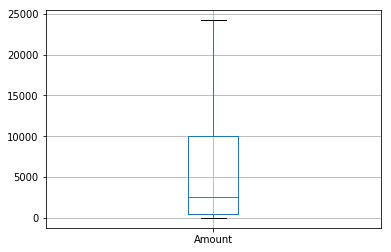

In [15]:
boxplot2 = data.boxplot(column='Amount', showfliers=False) #remove outliers

In [16]:
data.Amount.quantile([0.25,0.5,0.75])

0.25      530.459
0.50     2610.000
0.75    10000.000
Name: Amount, dtype: float64

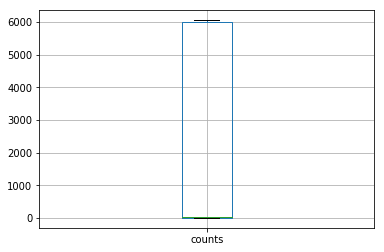

In [17]:
boxplot3 = result.boxplot(column='counts', showfliers=False) 

In [18]:
result.counts.quantile([0.25,0.5,0.75])

0.25       4.0
0.50      14.0
0.75    6004.0
Name: counts, dtype: float64

In [19]:
large_transactions = result[result['counts'] > result.counts.quantile(0.85)] #transaction이 q3보다 많이 일어난 계정

In [20]:
big_transactions = result[result['Amount'] > result.Amount.quantile(0.85)] #transaction의 금액이 q3보다 큰 계정

In [21]:
print("large transactions: ", len(large_transactions),"\nbig_transactions: ", len(big_transactions))

large transactions:  42883 
big_transactions:  45322


In [22]:
print("large transactions in %: ", len(large_transactions)/ len(data2.Account)*100,"\nbig_transactions in %: ", len(big_transactions)/len(data2.Account)*100)

large transactions in %:  78.7132892804699 
big_transactions in %:  83.19016152716593


* 휴면계정 - recent timestamp가 1년 이상 지난 것들도 있음(2017년에 멈춤) , active한 계정이 몇 개인지
* 0 balance accounts 수
* transactions 수가 많은지
*  가격 변동성이 적은지
* 부의 분배가 평등한지

### 0 Balance

In [23]:
zero_balance = len(data2[data2["Balance"] == 0]) / len(data2.Account) * 100
print("0 Blanace accounts in %: ", zero_balance)

0 Blanace accounts in %:  48.590308370044056


### Transferred within 24h

In [24]:
data.sort_values(by='Unix Timestamp', inplace=True)
data.head()

,TXID,Date,Unix Timestamp,From Address,To Address,Amount
0,0xd2b983fb1546526f720dbd42a931f4390cbac3d741a2...,2017-09-17,2017-09-16 21:29:09,0xf55037738604fddfc4043d12f25124e94d7d1780,0xcd43a19ea5e4f9fcf229df53f86747ad2c5613be,350000000.0
1,0x9db683edbcc99b3b14df2e47935b68b2fdc048d5c34c...,2017-09-17,2017-09-16 21:32:59,0xf55037738604fddfc4043d12f25124e94d7d1780,0x98c63b7b319dfbdf3d811530f2ab9dfe4983af9d,350000000.0
2,0x392c4747ac38d2f2530dedc2b453474bb925f2cf1cb4...,2017-09-17,2017-09-16 21:38:28,0xf55037738604fddfc4043d12f25124e94d7d1780,0xe0362f7445e3203a496f6f8b3d51cbb413b69be2,50000000.0
3,0x3990f1705765090f6d6e1a189896b32b20f08ea014b5...,2017-09-17,2017-09-16 21:40:12,0xf55037738604fddfc4043d12f25124e94d7d1780,0x75398564ce69b7498da10a11ab06fd8ff549001c,50000000.0
4,0xfb321f16f08aea1d378efc8d82d26d02e5319863e9c1...,2017-09-17,2017-09-16 21:43:49,0xf55037738604fddfc4043d12f25124e94d7d1780,0x5560d001f977df5e49ead7ab0bdd437c4ee3a99e,50000000.0


In [ ]:
big_transactions_2 = data[data['Amount'] > data.Amount.quantile(0.75)]
count = 0
lst = []
for index, row in big_transactions_2.iterrows():
    index_list = data.index[data['From Address'] == row['To Address']].tolist()
    if index_list != []:
        d = data.iloc[index_list[0]]
        time = d['Unix Timestamp']
        if (time - row['Unix Timestamp']).days < 1:
            count += 1
            lst.append((row['From Address'], row['To Address'], row['Amount'], d['From Address'], d['To Address'], d['Amount']))

### Any Trnasfer scheme?

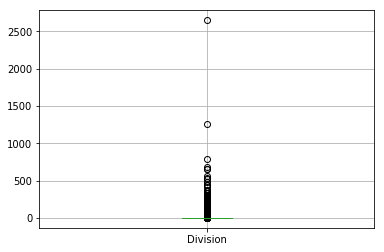

In [60]:
division = data.groupby(['From Address', 'Date']).size().reset_index(name='Division')
boxplot4 = division.boxplot(column='Division', showfliers=True) 

In [62]:
division[division['Division'] > 2500] # 공격한거같은데?

,From Address,Date,Division
4138,0x0d34437b027122e75361357ffb1487c11e33c5e8,2017-09-20,2649


### Active한 계정

In [26]:
import datetime
Inactive = data2[data2["Recent Seen (UnixTimeStamp)"] < (datetime.datetime.now() - datetime.timedelta(days=365))]
Inactive_accounts = len(Inactive)/len(data2)*100
print("Inactive accounts in % :", Inactive_accounts)

Inactive accounts in % : 57.74045521292217


In [27]:
zero_balance_inactive = len(Inactive[Inactive['Balance'] == 0])/len(Inactive)*100
print("Number of 0 balance accounts in inactive accounts: ", zero_balance_inactive)

Number of 0 balance accounts in inactive accounts:  54.27726738086912


### Concentration of Wealth

In [28]:
top_10 = data2.sort_values(by='Balance', ascending=False).iloc[0:10].Balance.sum()

In [29]:
top_100 = data2.sort_values(by='Balance', ascending=False).iloc[10:100].Balance.sum()

In [30]:
top_1000 = data2.sort_values(by='Balance', ascending=False).iloc[100:1000].Balance.sum()

In [31]:
bottom = data2.sort_values(by='Balance', ascending=False).iloc[1000:].Balance.sum()

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

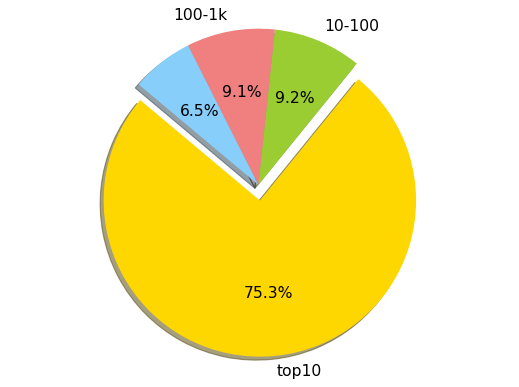

In [33]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

labels = 'top10', '10-100', '100-1k', ''
sizes = [top_10, top_100, top_1000, bottom]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})


plt.axis('equal')
plt.show()

In [34]:
from pip._internal import main as pipmain

pipmain(['install', 'plotly'])

0

In [44]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['top10', '10-100', '100-1k', 'bottom']
values = [top_10, top_100, top_1000, bottom]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+value', textinfo='percent',
               opacity = 0.8,
               textfont=dict(size=20),
               marker=dict(colors=colors))


py.iplot([trace], filename='basic_pie_chart')

### Gini Coefficient

In [2]:
def gini(x, w=None):
    # The rest of the code requires numpy arrays.
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n